# 筛选器

In [3]:
import openpyxl

wb = openpyxl.load_workbook('./a.xlsx')
sheet = wb["Sheet1"]
# 创建筛选器对象，auto_filter
# ref：使得筛选器对象引用指定区域
sheet.auto_filter.ref = "A1:E15"
wb.save("./a.xlsx")

# 设置筛选器条件

# 排序

In [9]:
import openpyxl

wb = openpyxl.load_workbook('./a.xlsx')
sheet = wb["Sheet1"]
# 创建筛选器对象，auto_filter
# ref：使得筛选器对象引用指定区域
sheet.auto_filter.ref = "A1:E15"
# 参数一：要排序的那一列，参数2：升降序
sheet.auto_filter.add_sort_condition("D2:D15")
wb.save("./排序.xlsx")

# 公式

In [10]:
import openpyxl

wb = openpyxl.Workbook()
sheet = wb.active

sheet["A1"] = 100
sheet["A2"] = 300
sheet["A3"] = "=SUM(A1:A2)"

wb.save("./公式使用.xlsx")


# 读取公式注意事项

In [15]:
import openpyxl

wb = openpyxl.load_workbook("./公式使用.xlsx",read_only=True)
sheet = wb.active

print(sheet["A3"].value)


=SUM(A1:A2)


# 列行宽高

In [29]:
import openpyxl
wb=openpyxl.Workbook()
sheet=wb.active

# 设置行高
sheet['A1']='行高被设置为 100'
sheet.row_dimensions[1].height=100

# 设置列宽
sheet['B2']='列宽被设置为 50'
sheet.column_dimensions['B'].width=50

wb.save('dimensions.xlsx')


# 合并拆分工作表

In [32]:
# 合并
import openpyxl
wb=openpyxl.Workbook()
sheet=wb.active
# merge_cells()合并的范围
sheet.merge_cells("A1:D3")
# 写入的话的单元格要是开头的那个单元格在合并的范围都可以
sheet["A1"] = "1234awsdfasdf"
wb.save("./合并.xlsx")

In [38]:
# 拆分
import openpyxl
wb=openpyxl.load_workbook("./合并.xlsx")
sheet=wb.active
# 拆开的会要指定全部范围，不支持在一个大范围拆成几个小的，只能拆成最小的单元格
sheet.unmerge_cells("A1:D3")
# 然后值会回到开头的单元格
wb.save("./拆分.xlsx")

# 冻结和解冻

In [43]:
# 冻结
import openpyxl
wb=openpyxl.load_workbook("./排序.xlsx")
sheet=wb.active
# sheet.freeze_panes = "A2" #冻结第一行,因为冻结的是上左的行列，所以左边没有了就冻结上面
sheet.freeze_panes = "B2"
wb.save("./冻结B2.xlsx")


In [44]:
# 解冻
sheet.freeze_panes = None # 解冻
wb.save("./解冻.xlsx")

# 绘制图表
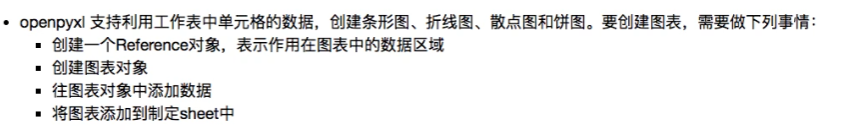

In [50]:
import openpyxl
wb=openpyxl.load_workbook("./排序.xlsx")
sheet=wb.active
# 1.创建一个Reference对象，表示作用在图表中的数据区域
values = openpyxl.chart.Reference(sheet,min_row=2,max_row=15,min_col=2,max_col=2)
# 2  创建图表对象 柱状图
chart = openpyxl.chart.BarChart()
# 设置标题
chart.title = "柱状图"
# 设置图列
chart.legend=None
# 设置x轴的标题
chart.x_axis.title = "名字"
# 设置y轴的标题
chart.y_axis.title = "年龄"
# 设置x轴刻度

# 3.往图表对象中添加数据
chart.add_data(values)
# 4 将图表添加到sheet中  
sheet.add_chart(chart,"G10")
wb.save("./这是柱状图.xlsx")

